In [1]:
# Create dependencies and settings
import pandas as pd
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Read data
complete_vertical_csv = '../csv/complete_data/complete_vertical.csv'
complete_vertical = pd.read_csv(complete_vertical_csv)
complete_vertical

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """


,ID,title,score,director,cast,country,added,release,rating,duration,listed_in,description,platform,release_decade
0,1,The Irishman,98,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,2019,R,209 min,Drama,Hit man Frank Sheeran looks back at the secret...,Netflix,2010s
1,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,Drama,A once-promising wrestler pursues the gold med...,Netflix,2010s
2,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,International,A once-promising wrestler pursues the gold med...,Netflix,2010s
3,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,Sports,A once-promising wrestler pursues the gold med...,Netflix,2010s
4,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu...",Netflix,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,"Laya DeLeon Hayes, Loretta Devine, Lara Jill M...",NaN,2021-03-12,2020,TV-Y,24 min,Kids,Doc McStuffins helps kids learn about healthy ...,Disney Plus,2020s
15370,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,"Laya DeLeon Hayes, Loretta Devine, Lara Jill M...",NaN,2021-03-12,2020,TV-Y,24 min,Medical,Doc McStuffins helps kids learn about healthy ...,Disney Plus,2020s
15371,6955,Ultimate Viking Sword,13,Peter Yost,Jay Sanders,NaN,2020-11-13,2019,TV-PG,45 min,Documentaries,"National Geographic reconstructs the Ulfberht,...",Disney Plus,2010s
15372,6955,Ultimate Viking Sword,13,Peter Yost,Jay Sanders,NaN,2020-11-13,2019,TV-PG,45 min,History,"National Geographic reconstructs the Ulfberht,...",Disney Plus,2010s


# Genre Analysis

In [2]:
# Clone and rename genre column and verify
complete_vertical.rename(columns={'listed_in': 'genre_level_1'}, inplace=True)
complete_vertical.insert(11, 'genre_level_2', complete_vertical['genre_level_1'])
complete_vertical.columns 

Index(['ID', 'title', 'score', 'director', 'cast', 'country', 'added',
       'release', 'rating', 'duration', 'genre_level_1', 'genre_level_2',
       'description', 'platform', 'release_decade'],
      dtype='object')

In [3]:
# Return a list of genres 
complete_vertical['genre_level_1'].unique()

array(['Drama', 'International', 'Sports', 'Documentaries',
       'Action & Adventure', 'Comedies', 'Thriller', 'Independent Movies',
       'Music', 'Stand Up', 'Sci-Fi & Fantasy',
       'Children & Family Movies', 'Horror & Suspense', 'Romance',
       'LGBTQ', 'Classic Movies', 'Cult Movies', 'Family', 'Anime',
       'Crime', 'Mystery', 'Animals & Nature', 'Black Stories',
       'Arthouse', 'Teen', 'Faith & Spirituality', 'Kids', 'Western',
       'Arts', 'Entertainment', nan, 'Special Interest', 'Coming of Age',
       'History', 'Animation', 'News', 'Cartoons', 'Romantic Comedies',
       'Adult Animation', 'Buddy', 'Lifestyle & Culture', 'Movies',
       'Military and War', 'Fantasy', 'Biographical', 'Dance', 'Disaster',
       'Anthology', 'Spy/Espionage', 'Parody', 'Survival', 'Superhero',
       'Reality', 'Medical', 'Variety', 'Science & Technology'],
      dtype=object)

In [4]:
# Coerce unspecified genres to NaN, drop, then verify
complete_vertical['genre_level_1'].replace('', np.nan, inplace=True)
number_na = complete_vertical[pd.isna(complete_vertical['genre_level_1'])].groupby('platform').count().iloc[0,0]
vertical_no_na = complete_vertical[complete_vertical['genre_level_1'].notna()]
if not (len(complete_vertical['ID']) - (len(vertical_no_na['ID']) + number_na)):
    print('true')

true


In [5]:
# Select films with ambiguous level 1 'movies' genre, drop, then verify
number_movies_genre = len(vertical_no_na[vertical_no_na['genre_level_1'] == 'Movies']['ID'])
vertical_clean = vertical_no_na[vertical_no_na['genre_level_1'] != 'Movies']
if not (len(vertical_no_na['ID']) - (len(vertical_clean['ID']) + number_movies_genre)):
    print('true')

true


In [6]:
# Create level 1 genres dictionary and verify you haven't left anything out 
genre_level_1_dict = {
    'Action': 'Action & Adventure',
    'Action & Adventure': 'Action & Adventure',
    'Adventure': 'Action & Adventure',
    'Adult Animation': 'Reality & Variety',
    'Animation': 'Animation',
    'Animals & Nature': 'Documentary',
    'Anime': 'Animation',
    'Anthology': 'Drama',
    'Arthouse': 'Drama',
    'Arts': 'Documentary',
    'Biographical': 'Documentary',
    'Black Stories': 'Documentary',
    'Buddy': 'Comedy',
    'Cartoons': 'Animation',
    'Children & Family Movies': 'Family',
    'Classic Movies': 'Drama',
    'Coming of Age': 'Drama',
    'Comedies': 'Comedy',
    'Crime': 'Thriller',
    'Cult Movies': 'Drama',
    'Dance': 'Music',
    'Disaster': 'Thriller',
    'Documentaries': 'Documentary',
    'Drama': 'Drama',
    'Entertainment': 'Reality & Variety',
    'Faith & Spirituality': 'Reality & Variety',
    'Family': 'Family',
    'Fantasy': 'Sci-Fi & Fantasy',
    'History': 'Documentary',
    'Horror': 'Horror',
    'Independent Movies': 'Drama',
    'International': 'International',
    'Kids': 'Family',
    'LGBTQ': 'Reality & Variety',
    'Lifestyle & Culture': 'Reality & Variety',
    'Medical': 'Documentary',
    'Military and War': 'Documentary',
    'Movies': '',
    'Music': 'Music',
    'Mystery': 'Thriller',
    'News': 'Reality & Variety',
    'Parody': 'Comedy',
    'Reality': 'Reality & Variety',
    'Romance': 'Romance',
    'Romantic Comedies': 'Romance',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Science & Technology': 'Documentary',
    'Special Interest': 'Reality & Variety',
    'Sports': 'Sports',
    'Spy/Espionage': 'Thriller',
    'Stand Up': 'Comedy',
    'Superhero': 'Superhero',
    'Survival': 'Comedy',
    'Suspense': 'Thriller',
    'Teen': 'Family',
    'Thriller': 'Thriller',
    'Variety': 'Reality & Variety',
    'Western': 'Western',
}
keys = list(set(genre_level_1_dict.keys()))
values = list(set(genre_level_1_dict.values()))
genres = list(complete_vertical['genre_level_1'].unique())
diff1 = list(set(keys) - set(genres))
diff2 = list(set(genres) - set(keys))
print("Values in keys but not in genres:", diff1)
print("Keys len:", len(keys))
print("Values in genres but not in keys:", diff2)
print("Genres len:", len(genres))

Values in keys but not in genres: ['Adventure', 'Suspense', 'Horror', 'Action']
Keys len: 58
Values in genres but not in keys: [nan, 'Horror & Suspense']
Genres len: 56


In [7]:
# Create level 1 genres and verify
vertical_tiered_genres = vertical_clean.copy()
vertical_tiered_genres['genre_level_1'] = vertical_tiered_genres['genre_level_1'].replace(genre_level_1_dict)
# triage_genres = vertical_tiered_genres.copy()
vertical_tiered_genres['genre_level_1'].unique()

array(['Drama', 'International', 'Sports', 'Documentary',
       'Action & Adventure', 'Comedy', 'Thriller', 'Music',
       'Sci-Fi & Fantasy', 'Family', 'Horror & Suspense', 'Romance',
       'Reality & Variety', 'Animation', 'Western', 'Superhero'],
      dtype=object)

In [8]:
# Find holes in genre level 1 data
holes = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].count().unstack(level=1)
nan_columns = holes.columns[holes.isna().any()].tolist()
nan_rows = holes.index[holes.isna().any(axis=1)].tolist()
holes.loc[nan_rows, nan_columns].fillna('none')

genre_level_1,Horror & Suspense,International,Superhero,Thriller,Western
platform,,,,,
Amazon Prime,747.0,123.0,none,none,95.0
Disney Plus,none,none,1.0,25.0,5.0
Hulu,139.0,22.0,none,171.0,none
Netflix,168.0,1533.0,none,315.0,none


In [9]:
# Find holes in genre 2 data
holes2 = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].count().unstack(level=1)
nan_columns2 = holes2.columns[holes2.isna().any()].tolist()
nan_rows2 = holes2.index[holes2.isna().any(axis=1)].tolist()
holes2.loc[nan_rows2, nan_columns2].T.fillna('none')

platform,Amazon Prime,Disney Plus,Hulu,Netflix
genre_level_2,,,,
Adult Animation,none,none,1.0,none
Animals & Nature,none,102.0,none,none
Animation,28.0,270.0,none,none
Anime,1.0,none,2.0,30.0
Anthology,none,6.0,none,none
Arthouse,50.0,none,none,none
Arts,163.0,none,none,none
Biographical,none,32.0,none,none
Black Stories,none,none,40.0,none


In [14]:
vertical_tiered_genres

,ID,title,score,director,cast,country,added,release,rating,duration,genre_level_1,genre_level_2,description,platform,release_decade
0,1,The Irishman,98,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,2019,R,209 min,Drama,Drama,Hit man Frank Sheeran looks back at the secret...,Netflix,2010s
1,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,Drama,Drama,A once-promising wrestler pursues the gold med...,Netflix,2010s
2,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,International,International,A once-promising wrestler pursues the gold med...,Netflix,2010s
3,2,Dangal,97,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",India,2017-06-21,2016,TV-PG,161 min,Sports,Sports,A once-promising wrestler pursues the gold med...,Netflix,2010s
4,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentary,Documentaries,"A broadcaster recounts his life, and the evolu...",Netflix,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,"Laya DeLeon Hayes, Loretta Devine, Lara Jill M...",NaN,2021-03-12,2020,TV-Y,24 min,Family,Kids,Doc McStuffins helps kids learn about healthy ...,Disney Plus,2020s
15370,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,"Laya DeLeon Hayes, Loretta Devine, Lara Jill M...",NaN,2021-03-12,2020,TV-Y,24 min,Documentary,Medical,Doc McStuffins helps kids learn about healthy ...,Disney Plus,2020s
15371,6955,Ultimate Viking Sword,13,Peter Yost,Jay Sanders,NaN,2020-11-13,2019,TV-PG,45 min,Documentary,Documentaries,"National Geographic reconstructs the Ulfberht,...",Disney Plus,2010s
15372,6955,Ultimate Viking Sword,13,Peter Yost,Jay Sanders,NaN,2020-11-13,2019,TV-PG,45 min,Documentary,History,"National Geographic reconstructs the Ulfberht,...",Disney Plus,2010s


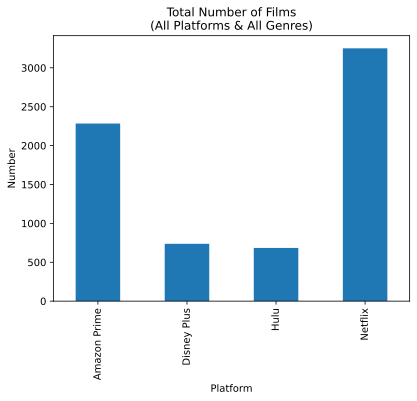

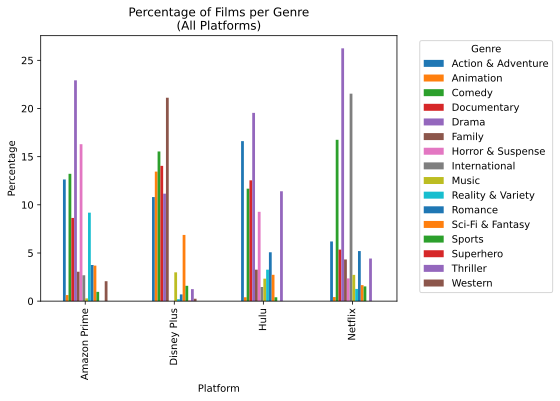

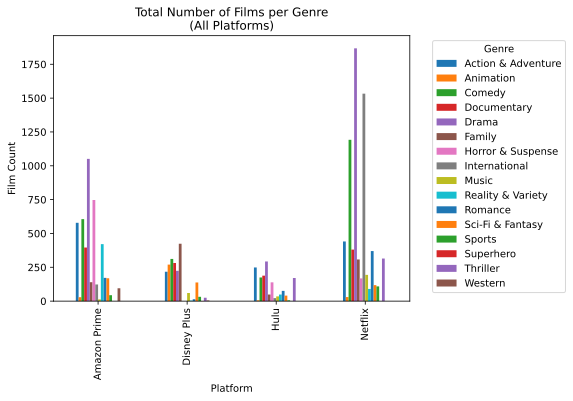

In [10]:
# Viz: total number of films per platform
data_no_duplicates = complete_vertical.drop_duplicates(subset='ID')
total_number_of_films = data_no_duplicates.groupby('platform').count().iloc[:,0]
total_number_of_films.plot(kind='bar', x='platform', y='ID', xlabel='Platform', ylabel='Number')
plt.title(f'Total Number of Films\n(All Platforms & All Genres)')
plt.show()

# Viz: Percentage of films per level 1 genre per platform 
genre1_count = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].count()
total_films_per_platform = vertical_tiered_genres.groupby('platform')['score'].count()
genre1_percentage = genre1_count.div(total_films_per_platform, level='platform') * 100
genre1_percentage_unstacked = genre1_percentage.unstack(level=1)
ax = genre1_percentage_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Percentage')
plt.title(f'Percentage of Films per Genre\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Viz: total number of films per genre per platform 
genre1_count_unstacked = genre1_count.unstack(level=1)
ax = genre1_count_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Film Count')
plt.title(f'Total Number of Films per Genre\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

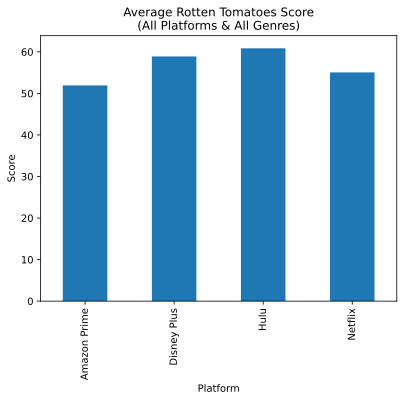

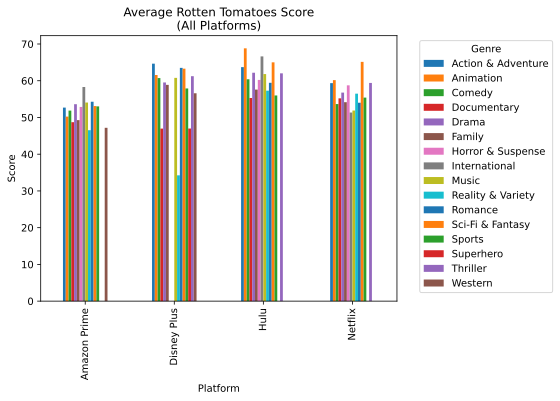

In [11]:
# Viz: Average RT scores for all films and all genres per platform
average_scores = vertical_tiered_genres.groupby('platform')['score'].mean()
average_scores.plot(kind='bar', x='platform', y='score', xlabel='Platform', ylabel='Score')
plt.title(f'Average Rotten Tomatoes Score\n(All Platforms & All Genres)')
plt.show()

# Viz: Average RT scores for films per level 1 genre per platform
genre1_scores = vertical_tiered_genres.groupby(['platform', 'genre_level_1'])['score'].mean()
genre1_scores_unstacked = genre1_scores.unstack(level=1)
ax = genre1_scores_unstacked.plot(kind='bar', xlabel='Platform', ylabel='Score')
plt.title(f'Average Rotten Tomatoes Score\n(All Platforms)')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time Analysis

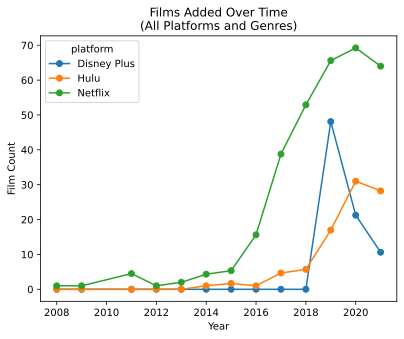

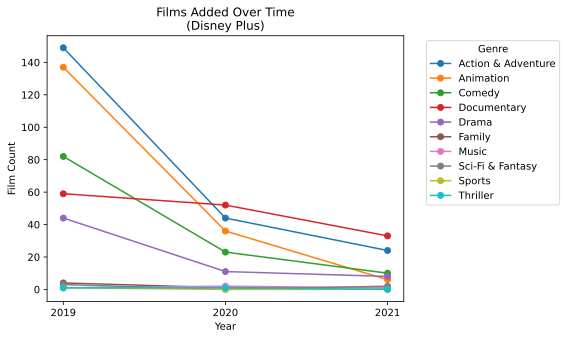

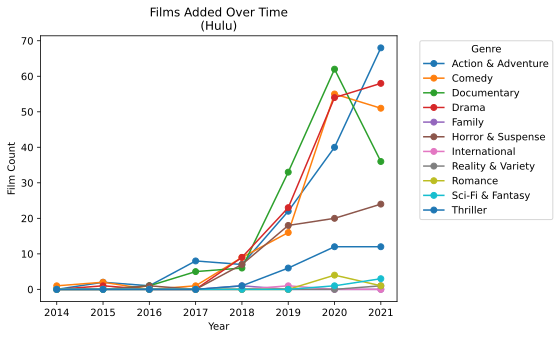

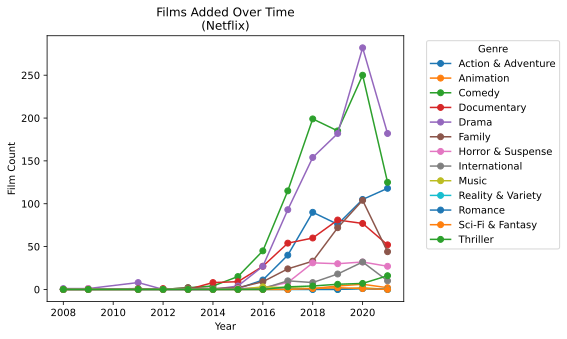

In [12]:
# Viz: Number of Films Added per Year per Platform
films_added_over_time = vertical_tiered_genres.drop_duplicates(subset='ID')
genre1_over_time = films_added_over_time.copy()
genre1_over_time['added'] = pd.to_datetime(genre1_over_time['added'])
genre1_over_time['added'] = genre1_over_time['added'].dt.year
genre1_grouped_plot = genre1_over_time.groupby(['platform', 'genre_level_1','added']).count().iloc[:,0]
data = genre1_grouped_plot.reset_index()
# data['year'] = data['year'].astype(int)
data.columns = ['platform', 'genre', 'year', 'count']
pivot_data = data.pivot_table(index='year', columns='platform', values='count', fill_value=0).iloc[:,1:]
pivot_data.plot(kind='line', marker='o')
plt.title(f'Films Added Over Time\n(All Platforms and Genres)')
plt.xlabel('Year')
plt.ylabel('Film Count')
plt.show()

# Viz: Number of Films Added per Year per Genre per Platform
platforms = data['platform'].unique()[1:]
for platform in platforms:
    platform_data = data[data['platform'] == platform]
    pivot_data = platform_data.pivot_table(index='year', columns='genre', values='count', fill_value=0)
    pivot_data.plot(kind='line', marker='o')
    plt.title(f'Films Added Over Time\n({platform})')
    plt.xlabel('Year')
    plt.ylabel('Film Count')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca() 
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
    plt.show()

In [13]:
# Find holes in 'added' data
pd.to_datetime(films_added_over_time['added'])
no_genres_grouped = films_added_over_time.groupby(['platform', 'added']).count(
).iloc[:, 0].unstack(level=1).T.fillna(0, inplace=False)
no_genres_time_series = pd.to_datetime(no_genres_grouped.index)
no_genres_bins = pd.cut(no_genres_time_series, 15)
no_genres_binned = no_genres_grouped.groupby(no_genres_bins).sum()
no_genres_binned = no_genres_binned.iloc[:, 0:4]
year_index = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
no_genres_binned.index = year_index
no_genres_binned

platform,Amazon Prime,Disney Plus,Hulu,Netflix
2007,0.0,0.0,0.0,1.0
2008,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,1.0
2010,0.0,0.0,0.0,1.0
2011,0.0,0.0,0.0,9.0
2012,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,7.0
2014,0.0,0.0,4.0,18.0
2015,0.0,0.0,1.0,44.0
2016,0.0,0.0,4.0,179.0


In [15]:
# # ------- UNUSED CODE -------
# # Get average RT scores per genre level 2 for each platform 
# genre2_scores = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].mean()
# genre2_scores
# # Calculate film count per genre per platform
# genre2_count = vertical_tiered_genres.groupby(['platform', 'genre_level_2'])['score'].count()
# # Calculate film percentage per genre per platform
# genre2_percentage = genre2_count.div(total_films_per_platform, level='platform') * 100
# genre2_percentage

# Sunburst

In [27]:
triage_genres = vertical_tiered_genres[['ID','title','score','director','release','genre_level_1','genre_level_2','platform']]
triage_genres

,ID,title,score,director,release,genre_level_1,genre_level_2,platform
0,1,The Irishman,98,Martin Scorsese,2019,Drama,Drama,Netflix
1,2,Dangal,97,Nitesh Tiwari,2016,Drama,Drama,Netflix
2,2,Dangal,97,Nitesh Tiwari,2016,International,International,Netflix
3,2,Dangal,97,Nitesh Tiwari,2016,Sports,Sports,Netflix
4,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,Documentary,Documentaries,Netflix
...,...,...,...,...,...,...,...,...
15369,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,2020,Family,Kids,Disney Plus
15370,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,2020,Documentary,Medical,Disney Plus
15371,6955,Ultimate Viking Sword,13,Peter Yost,2019,Documentary,Documentaries,Disney Plus
15372,6955,Ultimate Viking Sword,13,Peter Yost,2019,Documentary,History,Disney Plus


In [28]:
triage_genres['genre_level_2'].unique()

array(['Drama', 'International', 'Sports', 'Documentaries',
       'Action & Adventure', 'Comedies', 'Thriller', 'Independent Movies',
       'Music', 'Stand Up', 'Sci-Fi & Fantasy',
       'Children & Family Movies', 'Horror & Suspense', 'Romance',
       'LGBTQ', 'Classic Movies', 'Cult Movies', 'Family', 'Anime',
       'Crime', 'Mystery', 'Animals & Nature', 'Black Stories',
       'Arthouse', 'Teen', 'Faith & Spirituality', 'Kids', 'Western',
       'Arts', 'Entertainment', 'Special Interest', 'Coming of Age',
       'History', 'Animation', 'News', 'Cartoons', 'Romantic Comedies',
       'Adult Animation', 'Buddy', 'Lifestyle & Culture',
       'Military and War', 'Fantasy', 'Biographical', 'Dance', 'Disaster',
       'Anthology', 'Spy/Espionage', 'Parody', 'Survival', 'Superhero',
       'Reality', 'Medical', 'Variety', 'Science & Technology'],
      dtype=object)

In [29]:
list(triage_genres['genre_level_1'].unique())

['Drama',
 'International',
 'Sports',
 'Documentary',
 'Action & Adventure',
 'Comedy',
 'Thriller',
 'Music',
 'Sci-Fi & Fantasy',
 'Family',
 'Horror & Suspense',
 'Romance',
 'Reality & Variety',
 'Animation',
 'Western',
 'Superhero']

In [30]:
genre_level_2_dict = {'Documentaries': 'Documentary',
                      'Comedies': 'Comedy',
                      'Children & Family Movies': 'Family',
                      'Suspense': 'Thriller'}

# Create a copy of the DataFrame
triage_genres_copy = triage_genres.copy()

# Modify the copy
triage_genres_copy['genre_level_2'] = triage_genres_copy['genre_level_2'].replace(genre_level_2_dict)

In [31]:
triage_genres_copy['genre_level_2'] = triage_genres_copy.apply(lambda row: '' if row['genre_level_1'] == row['genre_level_2'] else row['genre_level_2'], axis=1)

In [32]:
list(triage_genres_copy['genre_level_2'].unique())

['',
 'Independent Movies',
 'Stand Up',
 'LGBTQ',
 'Classic Movies',
 'Cult Movies',
 'Anime',
 'Crime',
 'Mystery',
 'Animals & Nature',
 'Black Stories',
 'Arthouse',
 'Teen',
 'Faith & Spirituality',
 'Kids',
 'Arts',
 'Entertainment',
 'Special Interest',
 'Coming of Age',
 'History',
 'News',
 'Cartoons',
 'Romantic Comedies',
 'Adult Animation',
 'Buddy',
 'Lifestyle & Culture',
 'Military and War',
 'Fantasy',
 'Biographical',
 'Dance',
 'Disaster',
 'Anthology',
 'Spy/Espionage',
 'Parody',
 'Survival',
 'Reality',
 'Medical',
 'Variety',
 'Science & Technology']

In [33]:
dropped_duplicates_copy = triage_genres_copy.copy()
dropped_duplicates_copy[['genre_level_1','genre_level_2']] = ''
triaged = dropped_duplicates_copy.drop_duplicates()

In [34]:
triaged

,ID,title,score,director,release,genre_level_1,genre_level_2,platform
0,1,The Irishman,98,Martin Scorsese,2019,,,Netflix
1,2,Dangal,97,Nitesh Tiwari,2016,,,Netflix
4,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,,,Netflix
5,4,The Social Dilemma,93,Jeff Orlowski,2020,,,Netflix
6,5,Okja,92,Bong Joon Ho,2017,,,Netflix
...,...,...,...,...,...,...,...,...
15364,6952,Most Wanted Sharks,14,NaN,2020,,,Hulu
15366,6953,Most Wanted Sharks,14,NaN,2020,,,Disney Plus
15368,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,2020,,,Disney Plus
15371,6955,Ultimate Viking Sword,13,Peter Yost,2019,,,Disney Plus


In [39]:
triage_done = triaged.rename(columns={'genre_level_1':'genre','genre_level_2':'subgenre'})
triage_done

,ID,title,score,director,release,genre,subgenre,platform
0,1,The Irishman,98,Martin Scorsese,2019,,,Netflix
1,2,Dangal,97,Nitesh Tiwari,2016,,,Netflix
4,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,,,Netflix
5,4,The Social Dilemma,93,Jeff Orlowski,2020,,,Netflix
6,5,Okja,92,Bong Joon Ho,2017,,,Netflix
...,...,...,...,...,...,...,...,...
15364,6952,Most Wanted Sharks,14,NaN,2020,,,Hulu
15366,6953,Most Wanted Sharks,14,NaN,2020,,,Disney Plus
15368,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,2020,,,Disney Plus
15371,6955,Ultimate Viking Sword,13,Peter Yost,2019,,,Disney Plus


In [45]:
triage_done.to_csv('../csv/chads_data/no_genres.csv', index=False)

# Assign New Genres and Export

In [46]:
import json
import pandas as pd

# Read data
no_genres_csv = '../csv/chads_data/no_genres.csv'
no_genres = pd.read_csv(no_genres_csv)
no_genres

,ID,title,score,director,release,genre,subgenre,platform
0,1,The Irishman,98,Martin Scorsese,2019,NaN,NaN,Netflix
1,2,Dangal,97,Nitesh Tiwari,2016,NaN,NaN,Netflix
2,3,David Attenborough: A Life on Our Planet,95,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,NaN,NaN,Netflix
3,4,The Social Dilemma,93,Jeff Orlowski,2020,NaN,NaN,Netflix
4,5,Okja,92,Bong Joon Ho,2017,NaN,NaN,Netflix
...,...,...,...,...,...,...,...,...
6949,6952,Most Wanted Sharks,14,NaN,2020,NaN,NaN,Hulu
6950,6953,Most Wanted Sharks,14,NaN,2020,NaN,NaN,Disney Plus
6951,6954,Doc McStuffins: The Doc Is In,13,Chris Hamilton,2020,NaN,NaN,Disney Plus
6952,6955,Ultimate Viking Sword,13,Peter Yost,2019,NaN,NaN,Disney Plus


In [55]:
# Read data
genres_scores_urls_csv = '../csv/chads_data/genres_scores_urls.csv'
genres_scores_urls = pd.read_csv(genres_scores_urls_csv)
genres_scores_urls

,ID,platform,title,score,audience_score,director,release,genre,subgenre,url
0,1,Netflix,The Irishman,98,86.0,Martin Scorsese,2019,Drama,Crime,https://www.rottentomatoes.com/m/the_irishman
1,2,Netflix,Dangal,97,90.0,Nitesh Tiwari,2016,Sports,Coming of Age,https://www.rottentomatoes.com/m/dangal
2,3,Netflix,David Attenborough: A Life on Our Planet,95,97.0,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,Documentary,Nature,https://www.rottentomatoes.com/m/david_attenbo...
3,4,Netflix,The Social Dilemma,93,87.0,Jeff Orlowski,2020,Documentary,Science & Technology,https://www.rottentomatoes.com/m/the_social_di...
4,5,Netflix,Okja,92,83.0,Bong Joon Ho,2017,Sci-Fi & Fantasy,Animals,https://www.rottentomatoes.com/m/okja
...,...,...,...,...,...,...,...,...,...,...
6949,6952,Hulu,Most Wanted Sharks,14,NaN,NaN,2020,Documentary,Animals,https://www.rottentomatoes.com/m/most_wanted_s...
6950,6953,Disney Plus,Most Wanted Sharks,14,NaN,NaN,2020,Documentary,Animals,https://www.rottentomatoes.com/m/most_wanted_s...
6951,6954,Disney Plus,Doc McStuffins: The Doc Is In,13,NaN,Chris Hamilton,2020,Animation,Kids,https://www.rottentomatoes.com/m/doc_mcstuffin...
6952,6955,Disney Plus,Ultimate Viking Sword,13,NaN,Peter Yost,2019,Action & Adventure,Fantasy,https://www.rottentomatoes.com/search?search=U...


In [56]:
#Clean genres 
genres_to_replace = list(genres_scores_urls['genre'].value_counts().index[10:])
genres_scores_urls['genre'] = genres_scores_urls['genre'].replace(genres_to_replace, 'Other')
genres_scores_urls['genre'] = genres_scores_urls['genre'].replace("Horror & Suspense", 'Thriller')

In [57]:
# Clean subgenres
subgenres_to_replace = list(genres_scores_urls['subgenre'].value_counts().index[20:])
genres_scores_urls['subgenre'] = genres_scores_urls['subgenre'].replace(subgenres_to_replace, 'Other')
genres_scores_urls

,ID,platform,title,score,audience_score,director,release,genre,subgenre,url
0,1,Netflix,The Irishman,98,86.0,Martin Scorsese,2019,Drama,Crime,https://www.rottentomatoes.com/m/the_irishman
1,2,Netflix,Dangal,97,90.0,Nitesh Tiwari,2016,Sports,Coming of Age,https://www.rottentomatoes.com/m/dangal
2,3,Netflix,David Attenborough: A Life on Our Planet,95,97.0,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",2020,Documentary,Other,https://www.rottentomatoes.com/m/david_attenbo...
3,4,Netflix,The Social Dilemma,93,87.0,Jeff Orlowski,2020,Documentary,Other,https://www.rottentomatoes.com/m/the_social_di...
4,5,Netflix,Okja,92,83.0,Bong Joon Ho,2017,Other,Animals,https://www.rottentomatoes.com/m/okja
...,...,...,...,...,...,...,...,...,...,...
6949,6952,Hulu,Most Wanted Sharks,14,NaN,NaN,2020,Documentary,Animals,https://www.rottentomatoes.com/m/most_wanted_s...
6950,6953,Disney Plus,Most Wanted Sharks,14,NaN,NaN,2020,Documentary,Animals,https://www.rottentomatoes.com/m/most_wanted_s...
6951,6954,Disney Plus,Doc McStuffins: The Doc Is In,13,NaN,Chris Hamilton,2020,Animation,Kids,https://www.rottentomatoes.com/m/doc_mcstuffin...
6952,6955,Disney Plus,Ultimate Viking Sword,13,NaN,Peter Yost,2019,Action & Adventure,Fantasy,https://www.rottentomatoes.com/search?search=U...


In [58]:
# # Coerce scores to int
# genres_scores_urls[audience_score] = genres_scores_urls[audience_score]
# genres_scores_urls[['score', 'audience_score']] = genres_scores_urls[['score', 'audience_score']].astype(int)


In [59]:
nested_dict = {
    "name": "root",
    "children": []
}

platforms = genres_scores_urls['platform'].unique()

for platform in platforms:
    platform_data = genres_scores_urls[genres_scores_urls['platform'] == platform]
    platform_dict = {
        "name": platform,
        "children": []
    }
    
    genres = platform_data['genre'].unique()
    for genre in genres:
        genre_data = platform_data[platform_data['genre'] == genre]
        genre_dict = {
            "name": genre,
            "children": []
        }
        
        subgenres = genre_data['subgenre'].unique()
        for subgenre in subgenres:
            subgenre_data = genre_data[genre_data['subgenre'] == subgenre]
            subgenre_dict = {
                "name": subgenre,
                "value": [],
                "films": [],
            }
            
            # Here, we add a dictionary with movie details to the fourth nested object
            films = subgenre_data[['title', 'score', 'audience_score', 'url']].to_dict('records')
            value = len(films)
            subgenre_dict["value"] = value
            subgenre_dict["films"] = films

            genre_dict["children"].append(subgenre_dict)
        
        platform_dict["children"].append(genre_dict)
    
    nested_dict["children"].append(platform_dict)

# Convert the dictionary to a JSON string
json_str = json.dumps(nested_dict)

# Write the JSON string to a file
with open('../json/sunburst_data2.json', 'w') as f:
    f.write(json_str)


In [37]:
# # Create a nested dictionary from the DataFrame
# nested_dict = {
#     "name": "root",
#     "children": []
# }

# platforms = new_genres['platform'].unique()

# for platform in platforms:
#     platform_data = new_genres[new_genres['platform'] == platform]
#     platform_dict = {
#         "name": platform,
#         "children": []
#     }
    
#     genres = platform_data['genre'].unique()
#     for genre in genres:
#         genre_data = platform_data[platform_data['genre'] == genre]
#         genre_dict = {
#             "name": genre,
#             "children": []
#         }
        
#         subgenres = genre_data['subgenre'].unique()
#         for subgenre in subgenres:
#             subgenre_data = genre_data[genre_data['subgenre'] == subgenre]
#             subgenre_dict = {
#                 "name": subgenre,
#                 "value": [],
#                 "films": [],
#             }
            
#             # Here, we add a list of movie names to the fourth nested object
#             films = subgenre_data['title'].tolist()
#             value = len(films)
#             subgenre_dict["value"] = value
#             subgenre_dict["films"] = films

#             genre_dict["children"].append(subgenre_dict)
        
#         platform_dict["children"].append(genre_dict)
    
#     nested_dict["children"].append(platform_dict)

# # # Convert the dictionary to a JSON string
# json_str = json.dumps(nested_dict)

# # Write the JSON string to a file
# with open('your_json_file.json', 'w') as f:
#     f.write(json_str)



TypeError: write() argument must be str, not dict

In [131]:
# #Create Sunburst JSON
# def create_sunburst_json(df, levels, value_column):
#     def nested_dict(level, data):
#         if level == len(levels) - 1:
#             return {key: {'value': data[data[levels[level]] == key][value_column].sum()} for key in data[levels[level]].unique()}
#         else:
#             return {key: nested_dict(level + 1, data[data[levels[level]] == key]) for key in data[levels[level]].unique()}
    
#     return nested_dict(0, df)

# levels = ['level1', 'level2']
# value_column = 'value'

# sunburst_data = create_sunburst_json(df, levels, value_column)


# root_name = 'Root'
# sunburst_data = {root_name: sunburst_data}

# import json

# json_data = json.dumps(sunburst_data, indent=2)


# with open('sunburst_data.json', 'w') as f:
#     f.write(json_data)



In [132]:
# Triage genres data
# triage_genres = vertical_tiered_genres.copy()
# triage_genres = vertical_tiered_genres[['title','director','release','genre_level_1','genre_level_2','platform']]
# triage_genres['genre_level_1'].unique()